## (1) Delay per region

In [1]:
import pandas as pd
from matplotlib import pyplot as plot
data = pd.read_csv("../datasets/Ruter_data.csv", delimiter=';')

In [2]:
data = data[['Kommune', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']]
data.shape

(6000, 3)

In [3]:
# Helper methods
def clean_hour(time) : return pd.Timestamp(str(int(time[0:2]) % 24) + time[2:])
def time_delta(actual, expected) : return int((clean_hour(actual) - clean_hour(expected)).total_seconds())
def delay(actual, expected) : return time_delta(actual, expected)

The data set included some entries where actual arrival time was empty, meaning something went wrong in the data collection or rather that the bus never actually made it to its stop. We remove these entries.

In [4]:
# We remove entries without an arrival time
data = data[data.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra != ':']
cut_data = data.reset_index(drop=True)

actual_arrivals = cut_data['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']
expected_arrivals = cut_data['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
cut_data.shape

(5950, 3)

By removing the entries with no arrival time, we have reduced the dataset to 5950 entries.

In [5]:
# We insert a new column corresponding to the difference in actual and expected arrival times, giving us a figure for delay
cut_data.insert(3, 'Delay', [delay(actual_arrivals[i], expected_arrivals[i]) for i in range(len(data))], True)

In [6]:
# Due to extremerse on either side, we remove both the bottom and top 3 percentile
lower, upper = cut_data.Delay.quantile([0.06, 0.94])

cut_data = cut_data[(cut_data.Delay > lower) & (cut_data.Delay < upper)]
cut_data.shape

(5236, 4)

The set is now further reduced to 5592 entries

In [7]:
# We group the data by region and average the corresponding values
cut_data = cut_data.groupby(by='Kommune').mean()
cut_data.shape

(34, 1)

<AxesSubplot:xlabel='Kommune'>

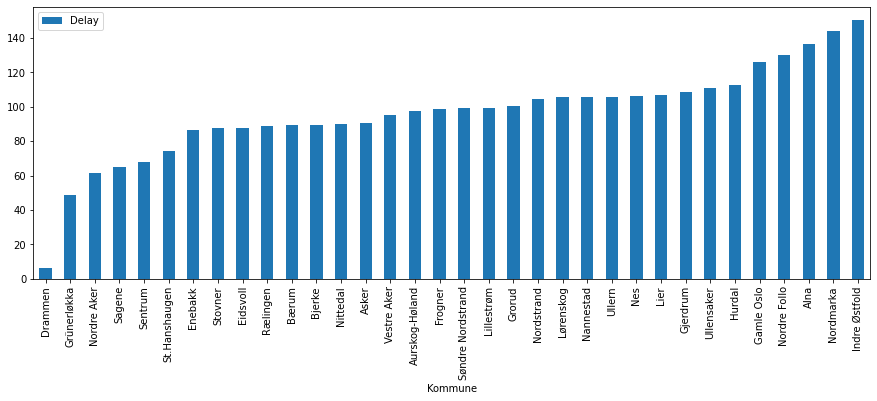

In [263]:
# We can then sort and plot it
cut_data.sort_values(by='Delay').plot(kind='bar', figsize=(15, 5))